In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

csv_path = "../input/claims/claims_copy.xlsx"
!pip install xlrd 
!pip install openpyxl

df = pd.read_excel(csv_path)
del df['country']
del df['insurance_group']
del df['rep_date']
del df['paid']
del df['reserved']
del df['s2model']
del df['claim_count']
del df['state']
del df['gwp_from']

In [116]:
df.acc_month = pd.to_datetime(df.acc_month)
df = df.set_index("acc_month")
df.isnull().sum()

incurred    0
dtype: int64

In [117]:
df

,incurred
acc_month,
2018-02-28,2000.00
2018-02-28,2000.00
2018-02-28,2386.75
2018-02-28,2386.75
2018-02-28,2386.75
...,...
2020-09-30,1127.58
2020-09-30,1127.58
2020-09-30,1127.58


In [118]:
train, test = df[:-500], df[-500:]

In [119]:
train.shape 
test.shape

(500, 1)

In [120]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [121]:
n_input = 80
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [122]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

In [123]:
model.fit_generator(generator,epochs=3)

Epoch 1/3
3323/3323 [==============================] - 578s 173ms/step - loss: 0.0024
Epoch 2/3
3323/3323 [==============================] - 580s 175ms/step - loss: 0.0020
Epoch 3/3
3323/3323 [==============================] - 579s 174ms/step - loss: 0.0020


In [124]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [125]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_predict[:100]

,Prediction
acc_month,
2020-02-29,9936.269924
2020-02-29,10364.420757
2020-02-29,10749.390297
2020-02-29,11096.380670
2020-02-29,11408.590761
...,...
2020-09-30,14205.455645
2020-09-30,14205.632687
2020-09-30,14205.787902


In [126]:
#df_predict = df_predict.loc[~df_predict.index.duplicated(keep='first')]
#df_test = pd.concat([df,df_predict], axis=0)
#df_test

In [127]:
"""plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['incurred'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()"""

"plt.figure(figsize=(20, 5))\nplt.plot(df_test.index, df_test['incurred'])\nplt.plot(df_test.index, df_test['Prediction'], color='r')\nplt.legend(loc='best', fontsize='xx-large')\nplt.xticks(fontsize=18)\nplt.yticks(fontsize=16)\nplt.show()"

In [128]:
"""pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)"""

rmse:  [nan]


In [129]:
train = df

In [130]:
scaler.fit(train)
train = scaler.transform(train)

In [131]:
n_input = 48
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [132]:
model.fit_generator(generator,epochs=3)

Epoch 1/3
3412/3412 [==============================] - 355s 104ms/step - loss: 0.0018
Epoch 2/3
3412/3412 [==============================] - 351s 103ms/step - loss: 0.0017
Epoch 3/3
3412/3412 [==============================] - 354s 104ms/step - loss: 0.0016


In [133]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [134]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,49) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates

,incurred
2020-10-30,NaN
2020-11-30,NaN
2020-12-30,NaN
2021-01-30,NaN
2021-02-28,NaN
2021-03-30,NaN
2021-04-30,NaN
2021-05-30,NaN
2021-06-30,NaN
2021-07-30,NaN


In [135]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

#df_proj = pd.concat([df,df_predict], axis=0)
df_predict

,Prediction
2020-10-30,3301.025200
2020-11-30,3583.924346
2020-12-30,3852.781364
2021-01-30,4109.405483
2021-02-28,4354.085305
2021-03-30,4587.220995
2021-04-30,4809.280623
2021-05-30,5020.758939
2021-06-30,5222.155541
2021-07-30,5414.050062


In [138]:
df_predict.to_csv("./df_48months_forecasted")

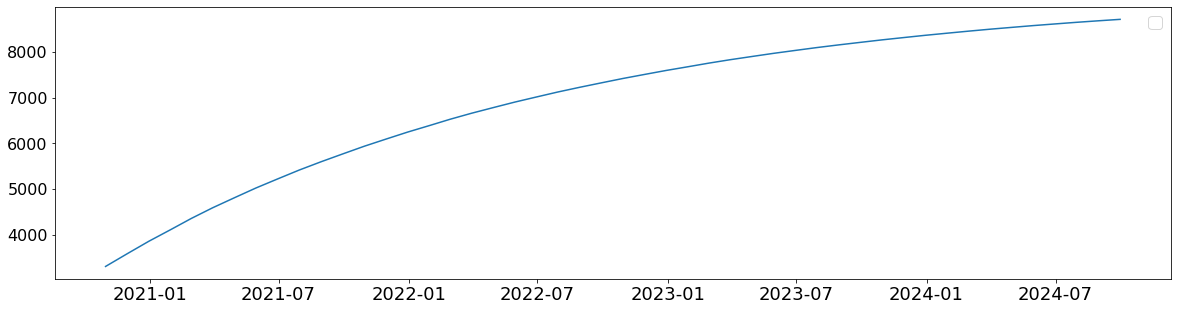

In [139]:
plt.figure(figsize=(20, 5))
plt.plot(df_predict.index, df_predict['Prediction'])
#plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()